# MNISTの手書き数字認識
http://tensorflow.classcat.com/2016/03/09/tensorflow-cc-mnist-for-ml-beginners/

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import seaborn as sns
import tensorflow as tf
%matplotlib inline

※ tensorflow にはMNISTのサンプルデータをダウンロードするためのモジュールが備わっている

In [179]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


※ Windowsの場合、データはC:\tmp\dataに保存される

ためしに画像を取り出して表示してみる

In [180]:
mnist.train.labels.shape,mnist.validation.labels.shape,mnist.test.labels.shape

((55000, 10), (5000, 10), (10000, 10))

In [181]:
images, labels = mnist.train.next_batch(6)

In [182]:
images.shape, labels.shape

((6, 784), (6, 10))

画像は1次元データとして表現されている。28ｘ28＝784

In [183]:
labels

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [184]:
images = images.reshape((6,28,28))

In [185]:
images.shape

(6, 28, 28)

In [186]:
def plotchr(image,label,i):
    sns.set_context("talk")
    plt.subplot(1,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title("%d" % np.argmax(label))
    plt.imshow(image,cmap=plt.cm.gray_r)

###### テストデータを先頭から６つ表示してみる

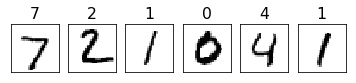

In [187]:
for i in range(6):
    images, labels = mnist.test.images[i], mnist.test.labels[i]
    images = images.reshape((28,28))
    plotchr(images,labels,i)

## 訓練データを先頭から6つ表示してみる

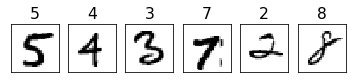

In [188]:
for i in range(6):
    images, labels = mnist.train.images[i], mnist.train.labels[i]
    images = images.reshape((28,28))
    plotchr(images,labels,i)

## 訓練例からランダムに6つ表示

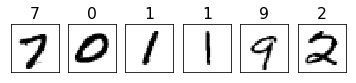

In [189]:
# sns.set_context("poster")
images, labels = mnist.train.next_batch(6)
images = images.reshape((6,28,28))
for i in range(6):
    plotchr(images[i],labels[i],i)

## テストデータからランダムに6つ表示

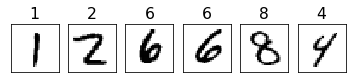

In [190]:
images, labels = mnist.test.next_batch(6)
images = images.reshape((6,28,28))

for i in range(6):
    plotchr(images[i],labels[i],i)


# モデルの作成

In [191]:
# モデルの作成
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x,W)+w0
p = tf.nn.softmax(f)

# 誤差関数とオプティマイザーを定義

In [192]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
# train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
train_step = tf.train.AdamOptimizer().minimize(loss)

# 正答率の計算式を定義

In [193]:
correct_prediction = tf.equal(tf.argmax(p,1),tf.argmax(t,1)) # 最大の番号が一致するかどうかの判定
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  

tf.cast : C言語で言うキャスト　correct_prediction は Boolean なのでそのままでは平均値はとれないので、真なら1.0、偽なら0.0という浮動小数点数にキャストしてから平均をとる

# セッションの開始

In [194]:
#sess = tf.Session()
sees = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [195]:
times = 0
for _ in range(2000):
    times += 1
    batch_xs,batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if times % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy],
                feed_dict={x:mnist.test.images, t:mnist.test.labels})
        print("Step: {0:d}, Loss: {1:f}, Accuracy: {2:f}".format(times, loss_val, acc_val))

Step: 100, Loss: 7596.456055, Accuracy: 0.843800
Step: 200, Loss: 5381.030273, Accuracy: 0.879400
Step: 300, Loss: 4533.486328, Accuracy: 0.888200
Step: 400, Loss: 4073.842773, Accuracy: 0.899100
Step: 500, Loss: 3777.294434, Accuracy: 0.904000
Step: 600, Loss: 3606.895508, Accuracy: 0.907800
Step: 700, Loss: 3434.129395, Accuracy: 0.909900
Step: 800, Loss: 3336.555420, Accuracy: 0.911100
Step: 900, Loss: 3244.187988, Accuracy: 0.913300
Step: 1000, Loss: 3196.597412, Accuracy: 0.913800
Step: 1100, Loss: 3127.806885, Accuracy: 0.913900
Step: 1200, Loss: 3086.204102, Accuracy: 0.914800
Step: 1300, Loss: 3026.024902, Accuracy: 0.916600
Step: 1400, Loss: 2993.714355, Accuracy: 0.916900
Step: 1500, Loss: 2965.597656, Accuracy: 0.917500
Step: 1600, Loss: 2927.501221, Accuracy: 0.919000
Step: 1700, Loss: 2912.040527, Accuracy: 0.919800
Step: 1800, Loss: 2873.033691, Accuracy: 0.920200
Step: 1900, Loss: 2861.559082, Accuracy: 0.920900
Step: 2000, Loss: 2861.095459, Accuracy: 0.921500


# 学習結果を用いて文字認識してみる

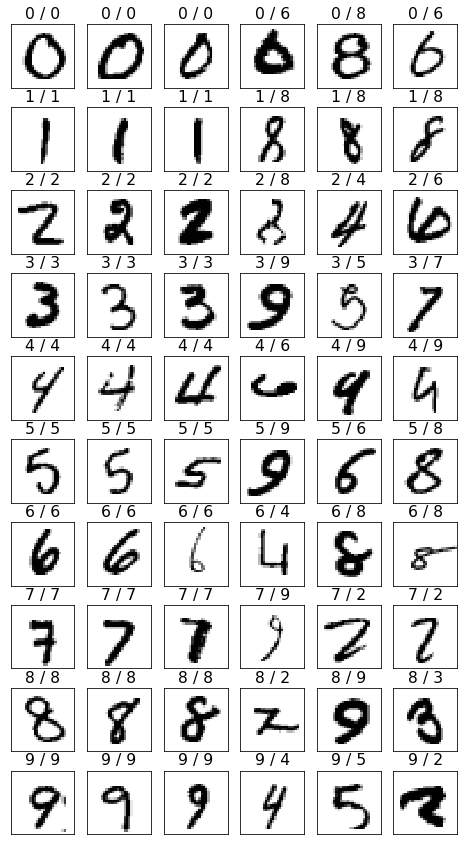

In [ ]:
plt.figure(figsize=(8,15))
def plotchr(image,label1,label2, i):
    sns.set_context("talk")
    plt.subplot(10,6,i)
    plt.xticks([])
    plt.yticks([])
    plt.title("%d / %d" % (np.argmax(label1),np.argmax(label2)))
    plt.imshow(image,cmap=plt.cm.gray_r)
    
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

# 0～9 と判定されたものについて、それぞれ正の例を３つ、負の例を３つ表示する
picnumber = 0
for i in range(10):
    c = 0
    for (image, label, pred) in zip(images, labels, p_val):
        prediction,actual = np.argmax(pred), np.argmax(label)
        if prediction != i:  # 
            continue
        if(c<3 and i == actual) or (c>=3 and i != actual):
            picnumber += 1
            plotchr(image.reshape((28,28)),pred,label,picnumber)
            c += 1
            if c > 5:
                break
            